## EDA on weather dataset to remove unrelated and non-contributing features

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
from os.path import abspath, join, dirname

BASE_DIR = dirname(abspath("__file__"))
DATA_DIR = join(BASE_DIR, "data")
DATA_PATH = join(DATA_DIR, "weatherHistory.csv")

In [3]:
from utils import *

In [4]:
df = pd.read_csv(DATA_PATH)

In [5]:
basic_data_check(df)

Shape
(96453, 12)
-----------------------------------
Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB
None
-----

In [6]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [7]:
# Making new columns from Formatted Data

# year 
df["year"] = df["Formatted Date"].map(lambda x: x.split("-")[0])

# month
df["month"] = df["Formatted Date"].map(lambda x: x.split("-")[1])

# day of month
df["day"] = df["Formatted Date"].map(lambda x: x.split("-")[2].split()[0])

# removing Formatted Date
df.drop(columns=["Formatted Date"], axis=1, inplace=True)

In [8]:
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,year,month,day
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006,04,01
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006,04,01
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006,04,01
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006,04,01
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006,04,01


In [9]:
# we have short summary in feature "Summary", so we can drop "Daily Summary"
df.drop(columns=["Daily Summary"], axis=1, inplace=True)
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),year,month,day
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,2006,04,01
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,2006,04,01
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,2006,04,01
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,2006,04,01
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,2006,04,01


In [10]:
cat_cols = ["Summary", "Precip Type", "year", "month", "day"]
num_cols = [i for i in df.columns if i not in cat_cols]

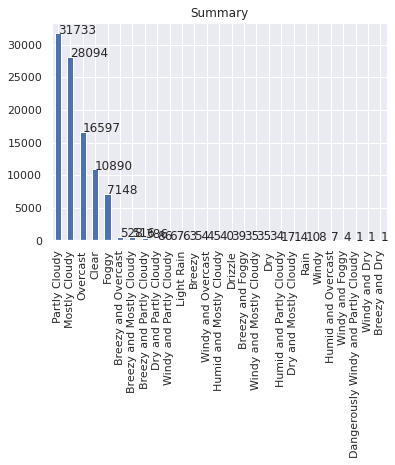

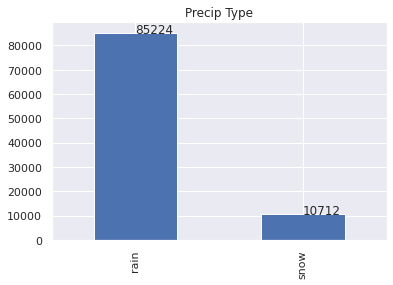

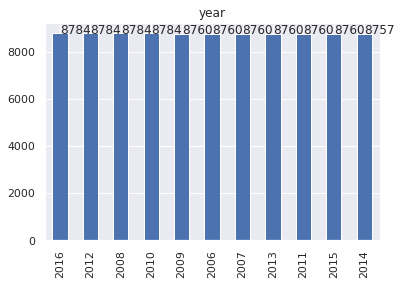

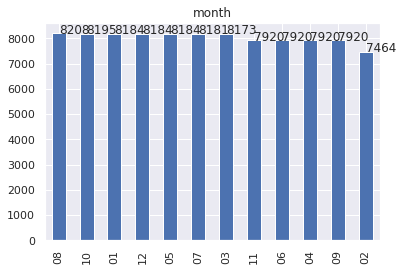

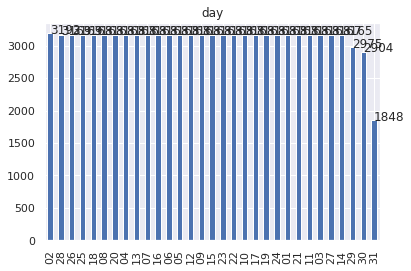

In [11]:
# Bar graphs for categorical columns
for col in cat_cols:
    df[col].value_counts().plot.bar()
    for num, counts in enumerate(df[col].value_counts()):
        plt.text(num, counts, counts)
    plt.title(col)
    plt.show()

In [12]:
# Reducing cardinality from the features

top_summaries = df["Summary"].value_counts()[:5]
df["Summary"] = df["Summary"].map(lambda x: x if x in top_summaries else "other")

df["Summary"].value_counts()

Partly Cloudy    31733
Mostly Cloudy    28094
Overcast         16597
Clear            10890
Foggy             7148
other             1991
Name: Summary, dtype: int64

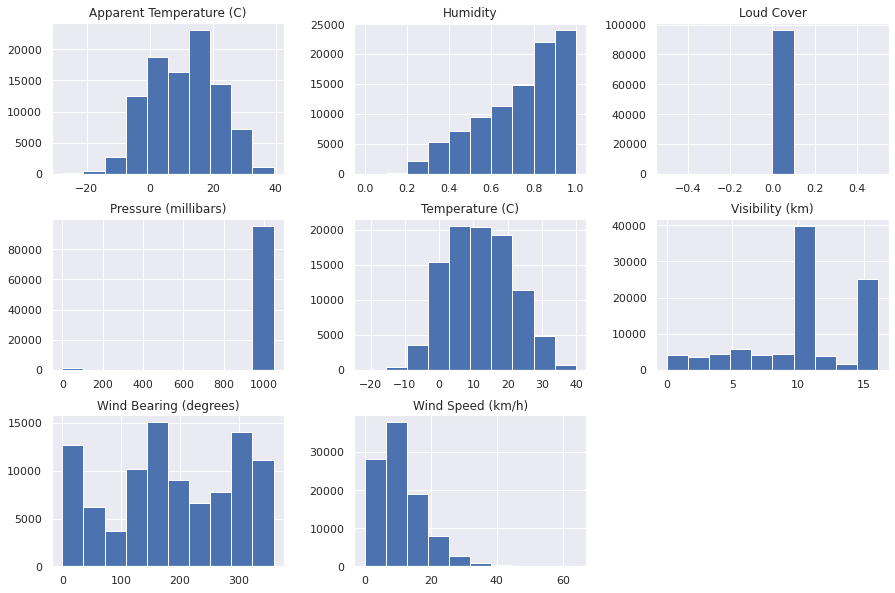

In [13]:
# Histograms for numerical columns
df.hist(figsize=(15,10))
plt.show()

In [14]:
# removing Pressure and Loud Cover

df.drop(columns=["Pressure (millibars)", "Loud Cover"], axis=1, inplace=True)